# 1. Objective

In this project, image classification is performed using three different types of deep convolutional neural networks in order to learn and experiment with deep neural networks.

For the purpose of this project, the dataset was re-classified into 3 classes of fruits, vegetables, and packages. View readme for more info.

In [ ]:
# data set reference
@inproceedings{klasson2019hierarchical,
  title={A Hierarchical Grocery Store Image Dataset with Visual and Semantic Labels},
  author={Klasson, Marcus and Zhang, Cheng and Kjellstr{\"o}m, Hedvig},
  booktitle={IEEE Winter Conference on Applications of Computer Vision (WACV)},
  year={2019}
}

SyntaxError: ignored

# Some code snippets which might be useful to get you started

In [ ]:
#@title Run this to import the right things
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import random
from six.moves import urllib
import io
import shutil

from IPython.display import clear_output, Image, display, HTML


import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import time
#from keras_applications.resnet import ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from keras.preprocessing import image
from keras import regularizers
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten
from keras import backend as K

We now create some data generators for working with the flowers data

Adapt the code below to work with the generators, then proceed with the experiments!

# Run This: Confusion matrix function

In [ ]:
#@title Run this confusion matrix function
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(15,15),dpi=200)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

  


# 1. Initial Set-up

## 1.1 Mount Google Drive and set the train, validation, and test data set path

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## set train, validation, and test paths 
train_path = '/content/gdrive/MyDrive/GroceryStoreDataset/dataset/train' 
validation_path = '/content/gdrive/MyDrive/GroceryStoreDataset/dataset/val'
test_path = '/content/gdrive/MyDrive/GroceryStoreDataset/dataset/test'

## 1.2 Intial preprocessing of data
This is the initial preprocessing of data without any data augmentation before the creation of the network. This is just the start.

In [ ]:
Classes = ['Zucchini', #Soy-Milk, Sour-Milk, plume, papaya, Nectarine, garlic
           'Yoghurt',
           'Tomato',
           'Soyghurt',
           'Sour-Cream',
           'Satsumas',
           'Red-Grapfruit',
           'Red-Beet',
           'Potato',
           'Pomegranate',
           'Pineapple',
           'Pepper',
           'Pear',
           'Peach',
           'Passion-Fruit',
           'Orange',
           'Onion',
           'Oatghurt',
           'Oat-Milk',
           'Milk',
           'Melon',
           'Mango',
           'Lime',
           'Lemon',
           'Leek',
           'Kiwi',
           'Juice',
           'Ginger',
           'Cucumber',
           'Carrots',
           'Cabbage',
           'Brown-Cap-Mushroom',
           'Banana',
           'Avocado',
           'Aubergine',
           'Asparagus',
           'Apple'
           ]

train_batches  = ImageDataGenerator().flow_from_directory(
    train_path, target_size=(224,224),  batch_size = 50)

validation_batches  = ImageDataGenerator().flow_from_directory(
    validation_path, target_size=(224,224),  batch_size = 10)

test_batches  = ImageDataGenerator().flow_from_directory(
    test_path, target_size=(224,224),  batch_size = 10)

Found 2446 images belonging to 37 classes.
Found 296 images belonging to 37 classes.
Found 2305 images belonging to 37 classes.


In [ ]:
train_batches.class_indices

{'Apple': 0,
 'Asparagus': 1,
 'Aubergine': 2,
 'Avocado': 3,
 'Banana': 4,
 'Brown-Cap-Mushroom': 5,
 'Cabbage': 6,
 'Carrots': 7,
 'Cucumber': 8,
 'Ginger': 9,
 'Juice': 10,
 'Kiwi': 11,
 'Leek': 12,
 'Lemon': 13,
 'Lime': 14,
 'Mango': 15,
 'Melon': 16,
 'Milk': 17,
 'Oat-Milk': 18,
 'Oatghurt': 19,
 'Onion': 20,
 'Orange': 21,
 'Passion-Fruit': 22,
 'Peach': 23,
 'Pear': 24,
 'Pepper': 25,
 'Pineapple': 26,
 'Pomegranate': 27,
 'Potato': 28,
 'Red-Beet': 29,
 'Red-Grapefruit': 30,
 'Satsumas': 31,
 'Sour-Cream': 32,
 'Soyghurt': 33,
 'Tomato': 34,
 'Yoghurt': 35,
 'Zucchini': 36}

In [ ]:
validation_batches.class_indices

{'Apple': 0,
 'Asparagus': 1,
 'Aubergine': 2,
 'Avocado': 3,
 'Banana': 4,
 'Brown-Cap-Mushroom': 5,
 'Cabbage': 6,
 'Carrots': 7,
 'Cucumber': 8,
 'Ginger': 9,
 'Juice': 10,
 'Kiwi': 11,
 'Leek': 12,
 'Lemon': 13,
 'Lime': 14,
 'Mango': 15,
 'Melon': 16,
 'Milk': 17,
 'Oat-Milk': 18,
 'Oatghurt': 19,
 'Onion': 20,
 'Orange': 21,
 'Passion-Fruit': 22,
 'Peach': 23,
 'Pear': 24,
 'Pepper': 25,
 'Pineapple': 26,
 'Pomegranate': 27,
 'Potato': 28,
 'Red-Beet': 29,
 'Red-Grapefruit': 30,
 'Satsumas': 31,
 'Sour-Cream': 32,
 'Soyghurt': 33,
 'Tomato': 34,
 'Yoghurt': 35,
 'Zucchini': 36}

In [ ]:
#take a look at output of the generators

for data_batch, labels_batch in train_batches:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break
    

data batch shape: (50, 224, 224, 3)
labels batch shape: (50, 37)


## 1.3 Sample images

Some vegetables and fruits have similar shapes while the inter-class variance to packages is high

In [ ]:
#@title Run this to import the right things
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import random
from six.moves import urllib
import io
import shutil
import keras
from IPython.display import clear_output, Image, display, HTML


import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import time
#from tensorflow.python.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50

from keras.preprocessing import image
from keras import regularizers
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten
from keras import backend as K

## 2.1 ResNet50

In [ ]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices()) 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9436646305251447673
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4442004107809174833
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50

resnet50_base_model = ResNet50(weights='imagenet', include_top=False)
#resnet50_trainable_model = ResNet50(weights=None, include_top=False)



94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
resnet50_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [ ]:
## building base model with frozen weights

base_x = resnet50_base_model.output
global_pooling_x = GlobalAveragePooling2D()(base_x)
#add dense layer
dense_layer = Dense(512, activation='relu')(global_pooling_x)
#add final output layer
base_prediction = Dense(37, activation = 'softmax')(dense_layer)

#create the whole network
resnet_transfer_model_1 = Model(inputs=resnet50_base_model.input, outputs=base_prediction)

resnet_transfer_model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

### Data augmentation and setting generator

In [ ]:
## Added more types of Data Augmentation for experimenting
## Goal is to get more data

res_train_datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

res_test_datagen = ImageDataGenerator(rescale=1./255)

res_train_generator = res_train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

res_validation_generator = res_test_datagen.flow_from_directory(
        validation_path,
        target_size=(224, 224),
        batch_size=10,
        class_mode='categorical')

## set steps per epoch for train
train_filenames_res = res_train_generator.filenames
steps_train_res = len(train_filenames_res)/res_train_generator.batch_size

## set steps per epoch for validation
validation_filenames_res = res_validation_generator.filenames
steps_valid_res = len(validation_filenames_res)/res_validation_generator.batch_size


print(len(validation_filenames_res), " ", steps_valid_res)

Found 2446 images belonging to 37 classes.
Found 296 images belonging to 37 classes.
296   29.6


### Compile and fit model

In [ ]:
resnet_transfer_model_1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

resnet_model_1_fit_generator = resnet_transfer_model_1.fit(
        res_train_generator,
        steps_per_epoch=steps_train_res,
        epochs=10,
        validation_data=res_validation_generator,
        validation_steps=steps_valid_res)


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
122/122 [==============================] - 1097s 9s/step - loss: 1.0324 - acc: 0.7343 - val_loss: 12.0464 - val_acc: 0.0338
Epoch 2/10
122/122 [==============================] - 49s 400ms/step - loss: 0.2453 - acc: 0.9321 - val_loss: 25.5520 - val_acc: 0.0169
Epoch 3/10
122/122 [==============================] - 48s 389ms/step - loss: 0.1399 - acc: 0.9636 - val_loss: 18.6705 - val_acc: 0.0169
Epoch 4/10
122/122 [==============================] - 49s 396ms/step - loss: 0.0968 - acc: 0.9710 - val_loss: 5.1305 - val_acc: 0.0304
Epoch 5/10
122/122 [==============================] - 48s 390ms/step - loss: 0.0755 - acc: 0.9787 - val_loss: 7.5148 - val_acc: 0.0338
Epoch 6/10
122/122 [==============================] - 49s 399ms/step - loss: 0.0947 - acc: 0.9738 - val_loss: 12.2786 - val_acc: 0.1723
Epoch 7/10
122/122 [==============================] - 48s 389ms/step - loss: 0.0624 - acc: 0.9832 - val_loss: 5.4954 - val_acc: 0.4662
Epoch 8/10
122/122 [==============================] 

In [ ]:
resnet_transfer_model_1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

resnet_model_1_fit_generator = resnet_transfer_model_1.fit(
        res_train_generator,
        steps_per_epoch=steps_train_res,
        epochs=20,
        validation_data=res_validation_generator,
        validation_steps=steps_valid_res)

Epoch 1/20
122/122 [==============================] - 61s 408ms/step - loss: 0.0538 - acc: 0.9857 - val_loss: 2.4922 - val_acc: 0.7399
Epoch 2/20
122/122 [==============================] - 48s 391ms/step - loss: 0.0519 - acc: 0.9890 - val_loss: 2.7446 - val_acc: 0.7432
Epoch 3/20
122/122 [==============================] - 49s 399ms/step - loss: 0.0577 - acc: 0.9865 - val_loss: 3.7484 - val_acc: 0.7128
Epoch 4/20
122/122 [==============================] - 48s 390ms/step - loss: 0.0607 - acc: 0.9832 - val_loss: 13.9714 - val_acc: 0.5743
Epoch 5/20
122/122 [==============================] - 50s 404ms/step - loss: 0.0520 - acc: 0.9869 - val_loss: 6.9268 - val_acc: 0.6250
Epoch 6/20
122/122 [==============================] - 48s 390ms/step - loss: 0.0444 - acc: 0.9906 - val_loss: 2.6884 - val_acc: 0.7568
Epoch 7/20
122/122 [==============================] - 49s 402ms/step - loss: 0.0492 - acc: 0.9865 - val_loss: 1.3003 - val_acc: 0.8446
Epoch 8/20
122/122 [==============================] - 

In [ ]:
resnet_transfer_model_1.save('/content/gdrive/MyDrive/groceries-image-recognition/resnet50_frozen_model')

In [ ]:
resnet_transfer_model_1 = keras.models.load_model('/content/gdrive/MyDrive/groceries-image-recognition/resnet50_frozen_model')

import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(resnet_transfer_model_1)
tflite_model = converter.convert()
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

### Plot Accuracy and Loss

<ipython-input-20-fdfec5b18c02>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b', label='Validation acc', color = 'r')
<ipython-input-20-fdfec5b18c02>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'r')


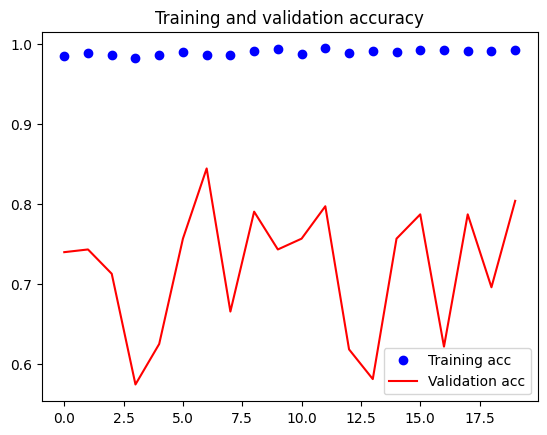

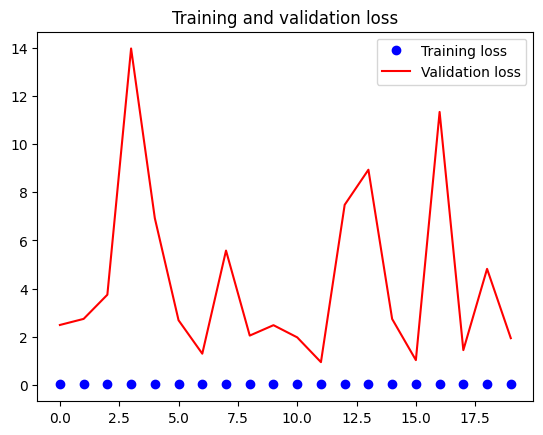

In [ ]:

import matplotlib.pyplot as plt

acc = resnet_model_1_fit_generator.history['acc']
val_acc = resnet_model_1_fit_generator.history['val_acc']
loss = resnet_model_1_fit_generator.history['loss']
val_loss = resnet_model_1_fit_generator.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc', color = 'r')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss', color = 'r')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Predict

In [ ]:
resnet_test_datagen = ImageDataGenerator(rescale=1./255)

resnet_test_generator = resnet_test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        batch_size=1,
        shuffle = False,
        class_mode='categorical')

filenames = resnet_test_generator.filenames
nb_samples = len(filenames)
#nb_samples


predict = resnet_transfer_model_1.predict_generator(resnet_test_generator,steps = nb_samples, verbose=2)


Found 2305 images belonging to 37 classes.


<ipython-input-21-e7b7193ce3d0>:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = resnet_transfer_model_1.predict_generator(resnet_test_generator,steps = nb_samples, verbose=2)


2305/2305 - 856s - 856s/epoch - 371ms/step


### Confusion matrix

Confusion matrix, without normalization
[[179   2   0 ...   0   0   0]
 [  0  14   0 ...   0   0   0]
 [  0   0  21 ...   0   0   0]
 ...
 [  1   0   0 ...  95   0   0]
 [  0   0   0 ...   0 172   0]
 [  0   0   0 ...   0   0  26]]


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

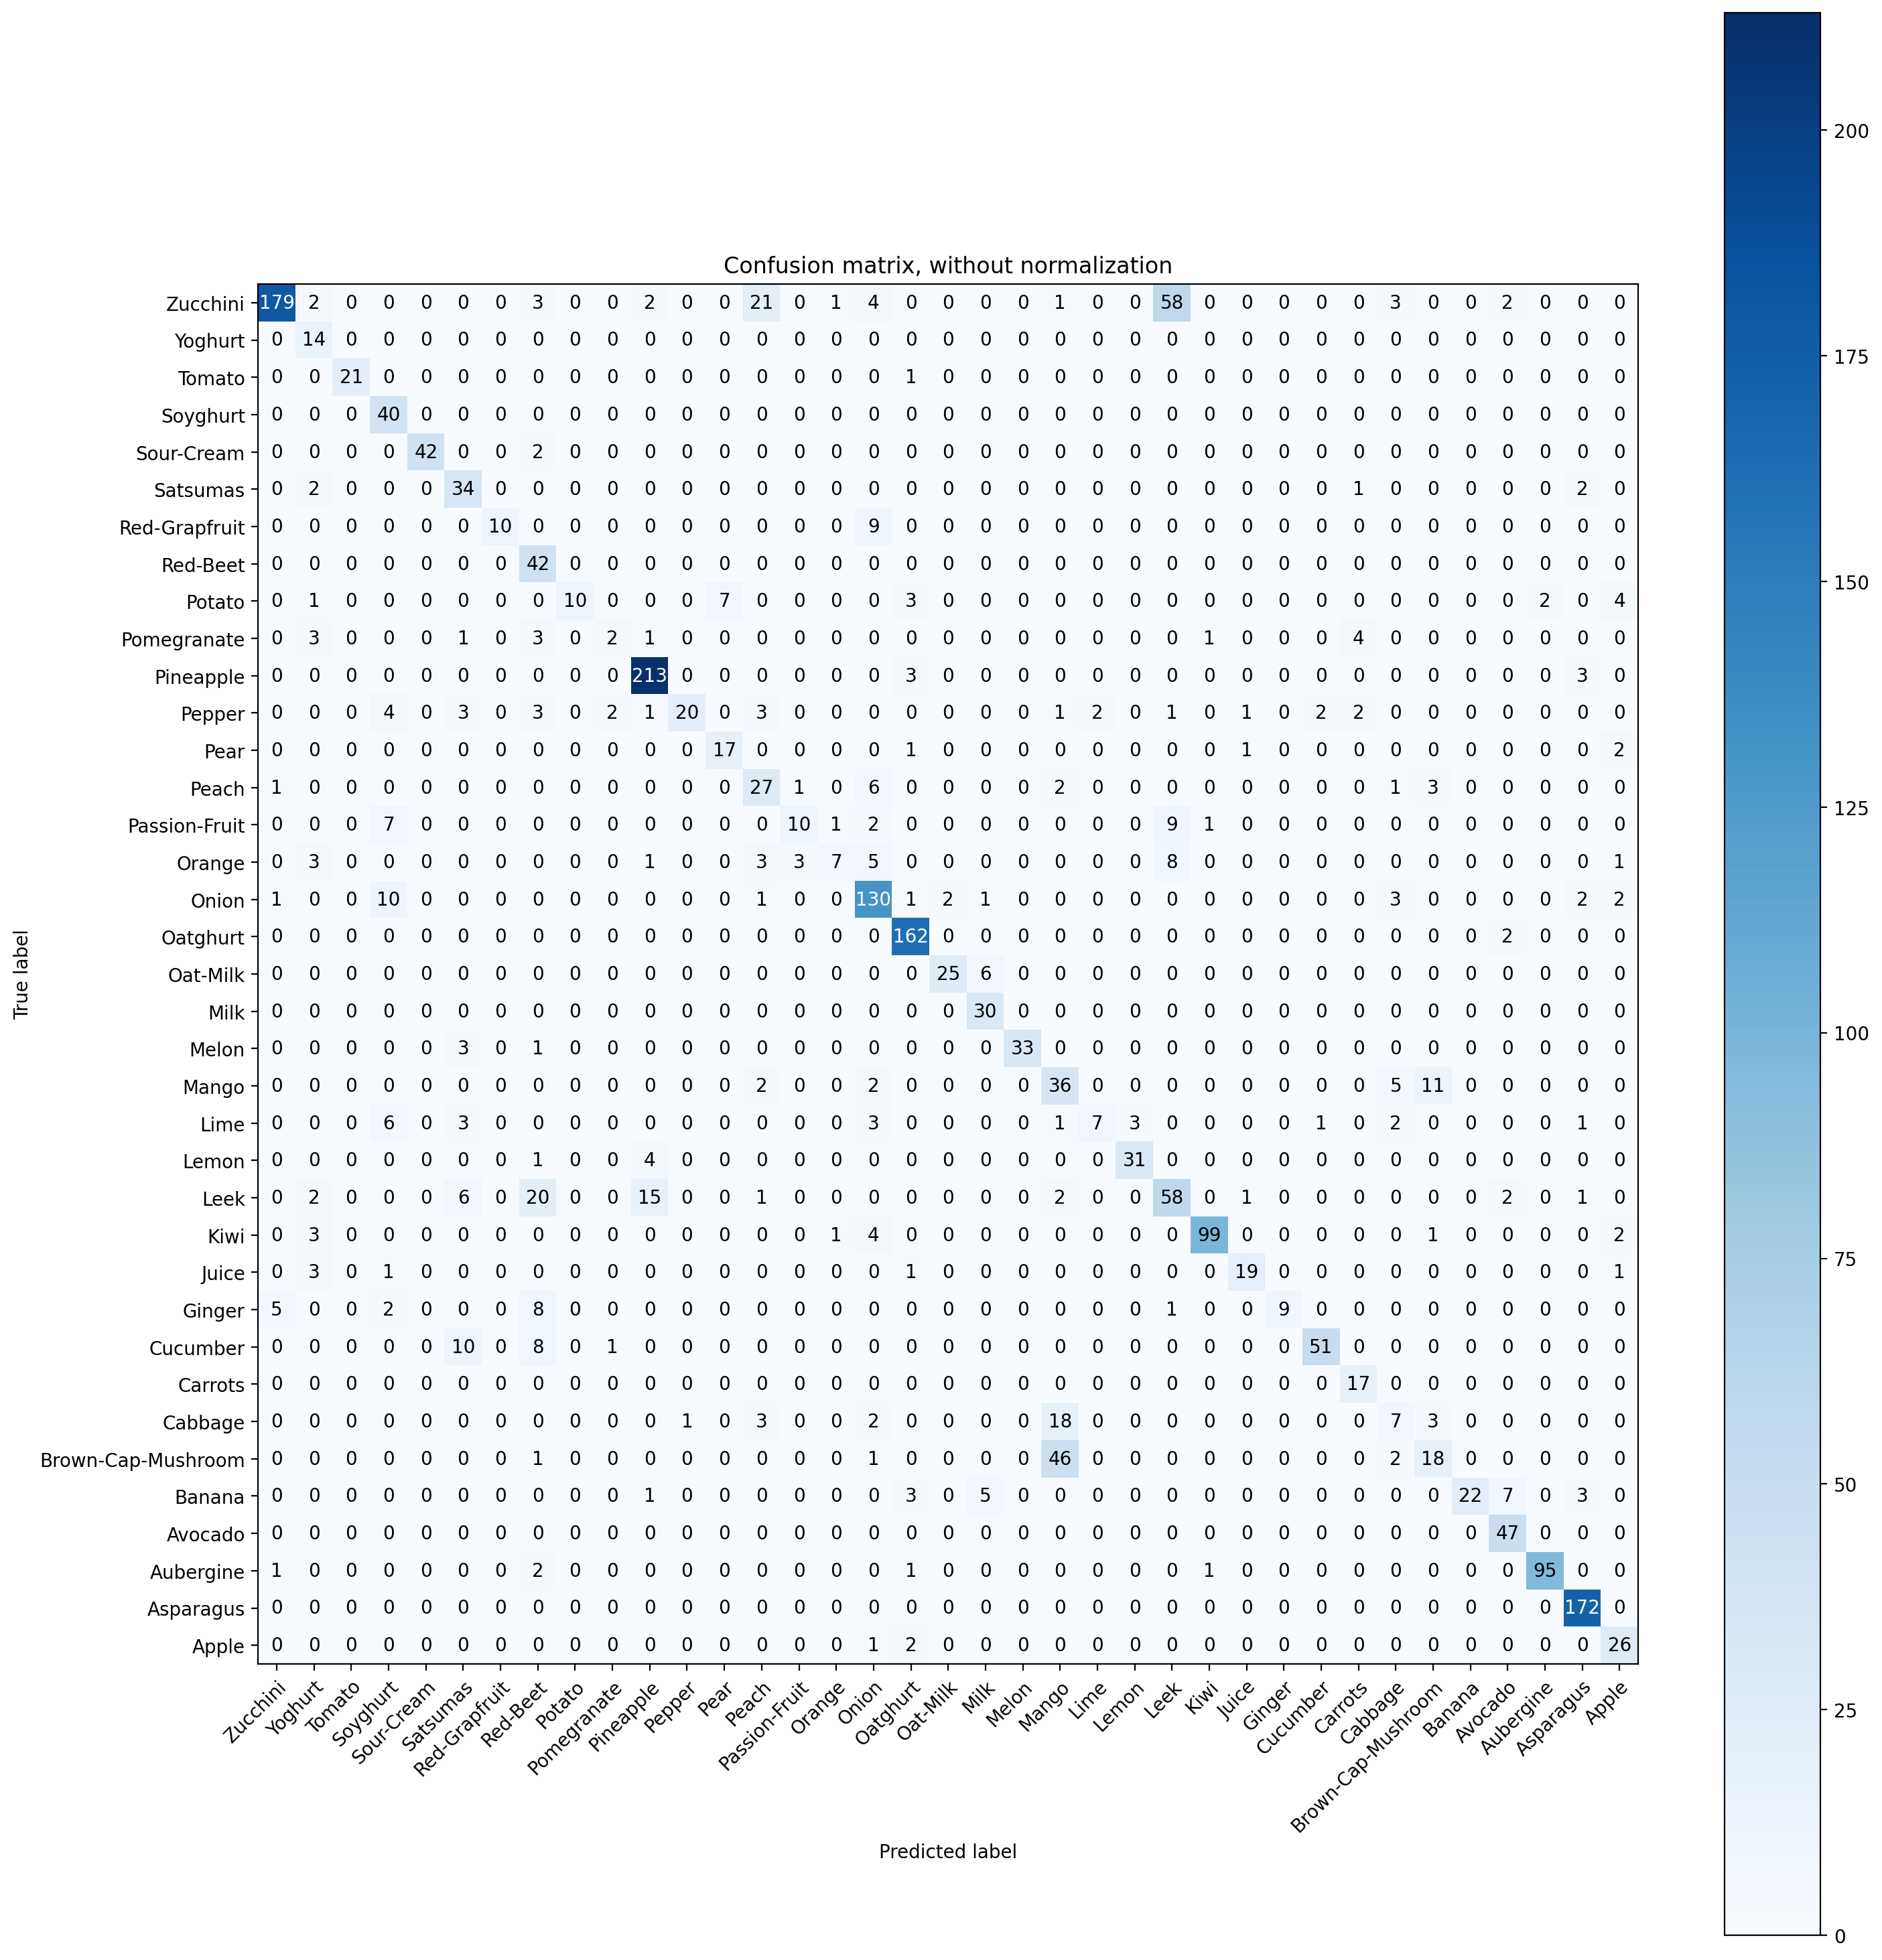

In [ ]:
r_y_true = resnet_test_generator.classes
r_y_pred = predict.argmax(axis=1)
plot_confusion_matrix(r_y_true, r_y_pred, classes=Classes,
                      title='Confusion matrix, without normalization')